# Classificação utilizando o algorítmo KNN
> *Diga-me com quem andas e eu direi quem tu és.* xD

## Introdução
Neste *notebook* temos uma aplicação do algorítmo KNN (k-Nearest Neighbors) utilizando a biblioteca *sklearn* e o dataset *Iris*. Antes de começar a aplicação, cabe explicar o que é e como o algorítmo KNN funciona.

O KNN é um dos diversos algorítmo de machine learning, trata-se de um método supervisinado não-paramétrico. O algorítmo consiste em pegar uma observação em um espaço de n-dimensões, buscar os k-vizinhos mais próximos e, por fim, classificar esta observação de acordo com seus k-vizinhos.

Deste modo, para criar o modelo precisamos definir seus hiperparâmetros:

1. valor k: é a quantidade de vizinhos mais próximos;

2. medida de similaridade: é o método que será utilizado para calcular a distância entre a observação e seus vizinhos.

obs.: existem outros hiperparâmetros que podem ser definidos, mas o k e a medida de similaridade são os principais.

## Bibliotecas
Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

## Dataset Iris
Informações sobre o dataset

In [2]:
iris = datasets.load_iris()

print(iris.keys())
print("Dimensões da base 'data':", iris.data.shape)
print("Dimensões da base 'target':", iris.target.shape)
print("Nome das variáveis: ", iris.feature_names)
print("Classes do dataset: ", iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Dimensões da base 'data': (150, 4)
Dimensões da base 'target': (150,)
Nome das variáveis:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes do dataset:  ['setosa' 'versicolor' 'virginica']


## Análise exploratório dos dados

In [3]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
# Estrutura da base 'data'
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# verificando a quantidade de cada espécie na amostra
unique_target, counts_target = np.unique(iris.target, return_counts=True)
pd.DataFrame(counts_target, index=iris.target_names, columns=['Frequência'])

,Frequência
setosa,50
versicolor,50
virginica,50


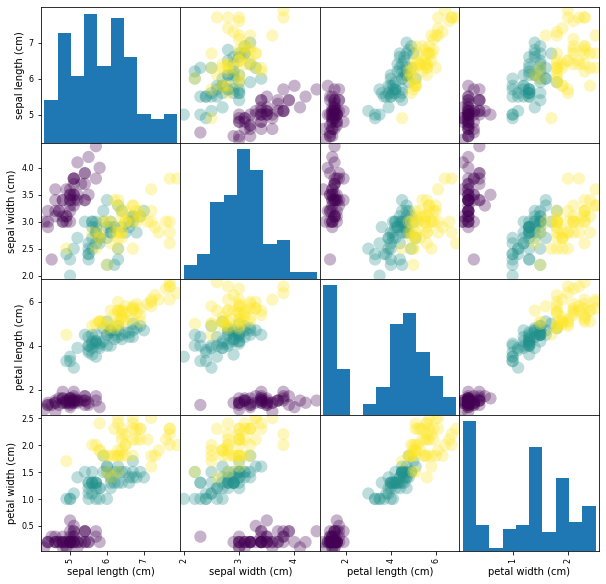

In [5]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [10, 10], s=150, marker='o',
                               alpha=0.3, diagonal='hist')

## Testando valores para 'k'
Criando modelos com diferentes k's e analisando como a acurácia dos modelos se comporta a medida que a quantidade de vizinhos aumenta.

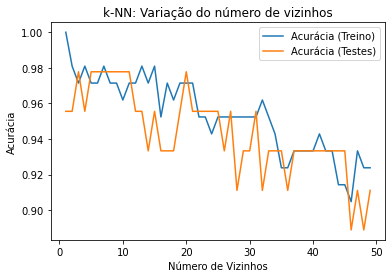

In [6]:
# separando os dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=4, stratify=y)

# Criando os arrays para armazenar a acurácia dos dados de treino e de teste, e
# setando a quantidade de vizinhos que serão testados para o modelo.
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop para os diferentes valores de k
for i, k in enumerate(neighbors):
    # Setup k-NN Classifier com k vizinhos: knn
    modelo_knn = KNeighborsClassifier(n_neighbors=k)

    # Modelo de classificação para os dados de treino
    modelo_knn.fit(X_train, y_train)
    
    # Calculando a acurácia dos dados de treinamento
    train_accuracy[i] = modelo_knn.score(X_train, y_train)

    # Calculando a acurácia dos dados de teste
    test_accuracy[i] = modelo_knn.score(X_test, y_test)

# Gráfico
plt.title("k-NN: Variação do número de vizinhos")
plt.plot(neighbors, train_accuracy, label = "Acurácia (Treino)")
plt.plot(neighbors, test_accuracy, label = "Acurácia (Testes)")
plt.legend()
plt.xlabel("Número de Vizinhos")
plt.ylabel('Acurácia')
plt.show()


No gráfigo acima podemos ver a acurácia para difentes entradas de k (1 à 50). Note que a medida que k aumenta a acurácia dos modelos vai diminuíndo. Mas a utlização de valores muito pequenos para k pode causar um overfitting do modelo de treino.

## Seleção do modelo
Seleciona o melhor modelo, testando diferentes k's e diferentes medidas de similaridade.

In [7]:
# Tunando os hiperparâmentros
parametros = {'n_neighbors': range(1, 50),
              'metric':['euclidean', 'manhattan', 'chebyshev']}

knn = KNeighborsClassifier()
gridsearch = GridSearchCV(knn, parametros, scoring = 'accuracy')
best_model = gridsearch.fit(X_train, y_train)

# Hiperparâmetros do modelo selecionado
print('Melhor k:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Melhor medida de similaridade:', best_model.best_estimator_.get_params()['metric'])

Melhor k: 9
Melhor medida de similaridade: euclidean


Para a escolha foram testados valores para k de 1 a 50, o limite de 50 foi estabelecido por se tratar da quntidade de amostras de cada espécie na amostra. Além disso, foram testadas as medidas de similaridade Euclidiana, Manhattan e Chebyshev. 
Com isso, chegou-se ao melhor modelo com 9 viznhos mais próximos e a medidade de similaridade Euclidiana.

In [8]:
print("Acurácia do melhor modelo: ", best_model.score(X_test, y_test))

Acurácia do melhor modelo:  0.9777777777777777


## Classificação do modelo VS Valores Observados
Compara a classificação feita pelo modelo selecionado com os classficação real das flores.

In [9]:
# dataframe com os dados de teste
colunas = iris.feature_names[:]
colunas.extend(['target', 'target_prediction'])
df = pd.DataFrame(data=np.column_stack((X_test,
                                        y_test,
                                        modelo_knn.predict(X_test))),
                  columns=colunas)

# craindo marcadores para os valores que foram classificados corretamente
marcador = y_test == best_model.predict(X_test)
marcadores = np.where(marcador, 'o', 'x')
# definido as cores para as espécies
cores = np.choose(y_test, choices=['purple', 'green','blue'])
# alterando a cor das observações classificadas incorretamente
cores[np.where(marcador==False)] = 'red'

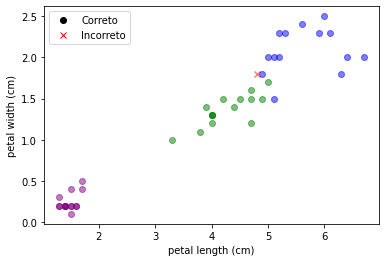

In [10]:
#### Legenda  ####

# definindo os acertos como 'o'
bola = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=6, label='Correto')
# definindo os erros como 'x'
xis = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                          markersize=6, label='Incorreto')
##################


for i in range(len(df)):
  plt.scatter(df.iloc[i, 2], df.iloc[i, 3], marker=marcadores[i],
              c=cores[i], alpha=0.5)
  plt.xlabel(df.keys()[2])
  plt.ylabel(df.keys()[3])
  plt.legend(handles = [bola, xis])
plt.show()

Apenas uma observação foi classificada incorretamente, abaixo vemos que a flor foi classificada como versicolor (target = 1) e ela é uma virginica (target = 2)

In [11]:
# qual observação foi classificada incorretamente
df.iloc[np.where(marcador==False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_prediction
2,6.0,3.0,4.8,1.8,2.0,1.0


## Modelo com distâncias ponderadas

Além da métrica de similaridade, podemos considerar uma medida que podera as distância dos k-vizinhos, atribuindo pesos proporcionais ao inverso da distância. Desta maneira os vizinhos mais próximos terão um peso maior na hora de classificar a observação.

In [12]:
# Tunando os hiperparâmentros considerando a distância ponderada
parametros = {'n_neighbors': range(1, 50),
              'metric': ['euclidean', 'manhattan', 'chebyshev'],
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
gridsearch = GridSearchCV(knn, parametros, scoring = 'accuracy')
best_model = gridsearch.fit(X_train, y_train)

# Hiperparâmetros do modelo selecionado
print('Melhor k:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Melhor medida de similaridade:', best_model.best_estimator_.get_params()['metric'])
print('Melhor modelo com distância porderada: ', best_model.best_estimator_.get_params()['weights'])

Melhor k: 8
Melhor medida de similaridade: euclidean
Melhor modelo com distância porderada:  distance


Considerando as distâncias poderadas chegamos a um modelo ainda melhor, com k-vizinhos igual a 8 e usando a distância euclideana chegamos a uma acurácia de 1.

In [13]:
print("Acurácia do melhor modelo: ", best_model.score(X_test, y_test))

Acurácia do melhor modelo:  1.0


Como ultima observação, o modelo foi selecionado setando a amostra de treino/teste em "random_state=4". Se tratando de um modelo supervisionado, seria interessante testar o modelo para outras amostras. 